# Analisis Exploratorio de Datos

## Importar datos y librerias

In [3]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
# Cargar dataset redWine y whiteWine
redWine = pd.read_csv('winequality-red.csv', sep=';')
whiteWine = pd.read_csv('winequality-white.csv', sep=';')

## Resumen de Datos

In [5]:
# Observar dataset redWine
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Observar dataset whiteWine 
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Cantidad de datos en redWine y whiteWine
print("Cantidad de datos en redWine: ", redWine.shape[0])
print("Cantidad de datos en whiteWine: ", whiteWine.shape[0])

Cantidad de datos en redWine:  1599
Cantidad de datos en whiteWine:  4898


In [8]:
# Tipos de datos en redWine
print("Red Wine:")
redWine.info()

Red Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# Tipos de datos en whiteWine
print("White Wine:")
whiteWine.info()

White Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Se observa que no es necesario hacer algun cambio en los datos, ya que no hay datos categoricos

In [10]:
# Crear columna 'type' en ambos datasets
redWine['type'] = 0
whiteWine['type'] = 1

In [11]:
# Unir ambos datasets
wine = pd.concat([redWine, whiteWine], ignore_index=True)

In [12]:
# Observar dataset wine
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
# Analisis estadistico de wine
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [14]:
# Resumen de datos en relacion al describe de wine en base al atributo 'quality'
print("Cantidad de datos en wine: ", wine.shape[0])
print("Calidad media de vinos: ", wine['quality'].mean())
print("Cantidad de vinos con calidad mayor a la media: ", wine[wine['quality'] > wine['quality'].mean()].shape[0])
print("Cantidad de vinos con calidad menor a la media: ", wine[wine['quality'] < wine['quality'].mean()].shape[0])
print("La desviacion estandar de la calidad de los vinos es: ", wine['quality'].std())
print("La calidad minima de los vinos es: ", wine['quality'].min())
print("La calidad maxima de los vinos es: ", wine['quality'].max())
print("El 25% de los vinos tiene una calidad menor a: ", wine['quality'].quantile(0.25))
print("El 75% de los vinos tiene una calidad mayor a: ", wine['quality'].quantile(0.75))
print("El ultimo 25% de los vinos tiene una calidad entre ", wine['quality'].quantile(0.25), " y ", wine['quality'].quantile(0.75))
print("La mayor concentracion de vinos se encuentra entre ", wine['quality'].quantile(0.25), " y ", wine['quality'].quantile(0.75))

Cantidad de datos en wine:  6497
Calidad media de vinos:  5.818377712790519
Cantidad de vinos con calidad mayor a la media:  4113
Cantidad de vinos con calidad menor a la media:  2384
La desviacion estandar de la calidad de los vinos es:  0.873255271531111
La calidad minima de los vinos es:  3
La calidad maxima de los vinos es:  9
El 25% de los vinos tiene una calidad menor a:  5.0
El 75% de los vinos tiene una calidad mayor a:  6.0
El ultimo 25% de los vinos tiene una calidad entre  5.0  y  6.0
La mayor concentracion de vinos se encuentra entre  5.0  y  6.0


## Graficos Histogramas y Boxplots

In [15]:
# Funcion para mostrar histograma y boxplot de un atributo
def histograma_boxplot(atributo):
  plt.figure(figsize=(10,4))

  plt.subplot(1,2,1)
  sns.histplot(wine[atributo])

  plt.subplot(1,2,2)
  sns.boxplot(data=wine[atributo])

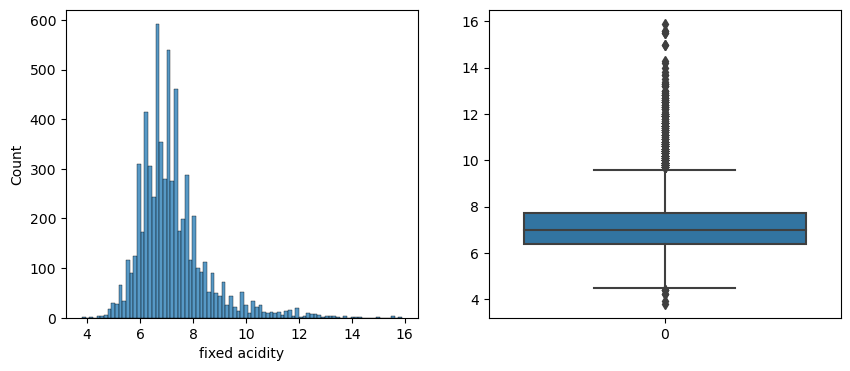

In [16]:
# Acidez fija histograma y boxplot
histograma_boxplot('fixed acidity')

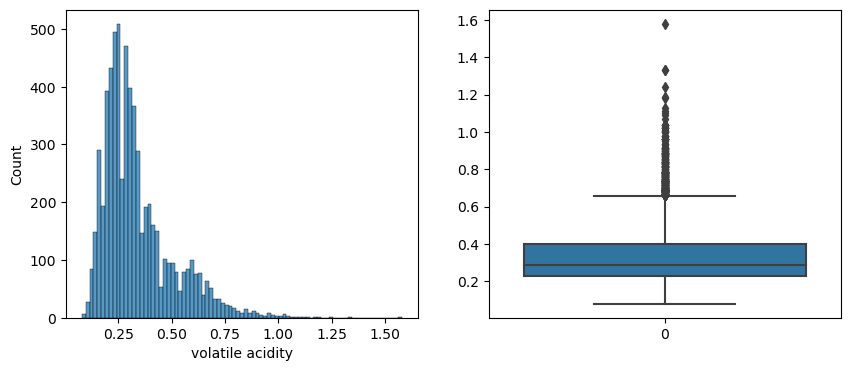

In [17]:
# Acidez volatil histograma y boxplot
histograma_boxplot('volatile acidity')


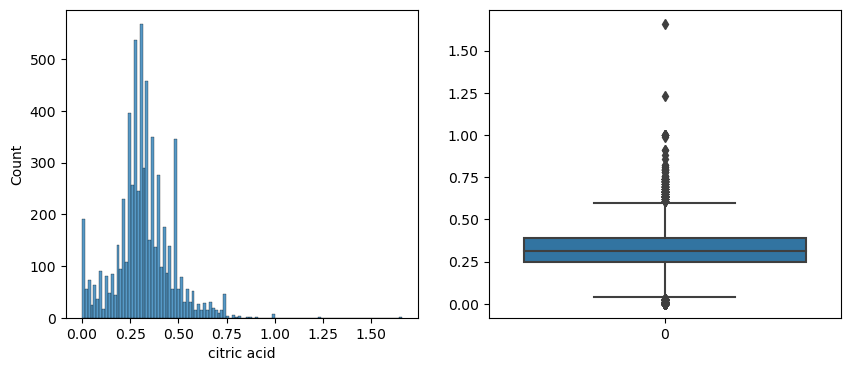

In [18]:
# Acido citrico histograma y boxplot
histograma_boxplot('citric acid')

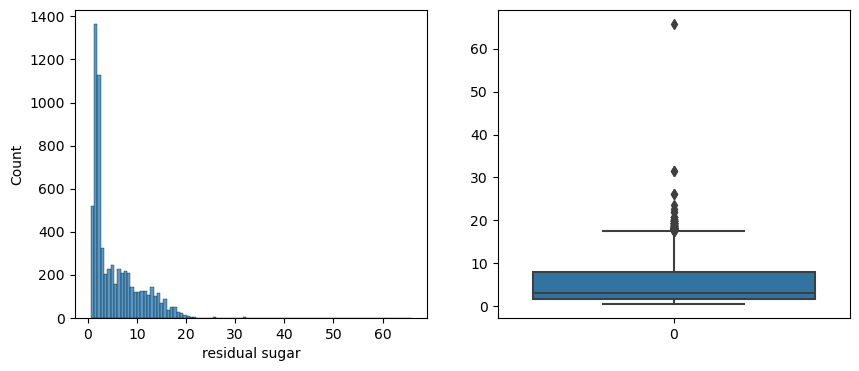

In [19]:
# Azucar residual histograma y boxplot
histograma_boxplot('residual sugar')

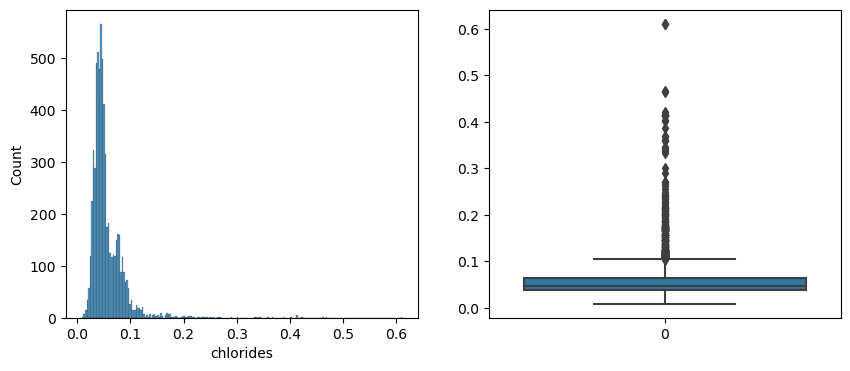

In [20]:
# Cloruros histograma y boxplot
histograma_boxplot('chlorides')

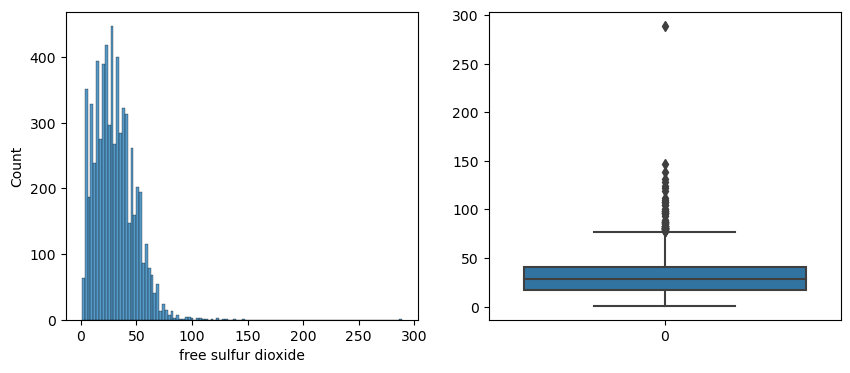

In [21]:
# Dioxido de azufre libre histograma y boxplot
histograma_boxplot('free sulfur dioxide')

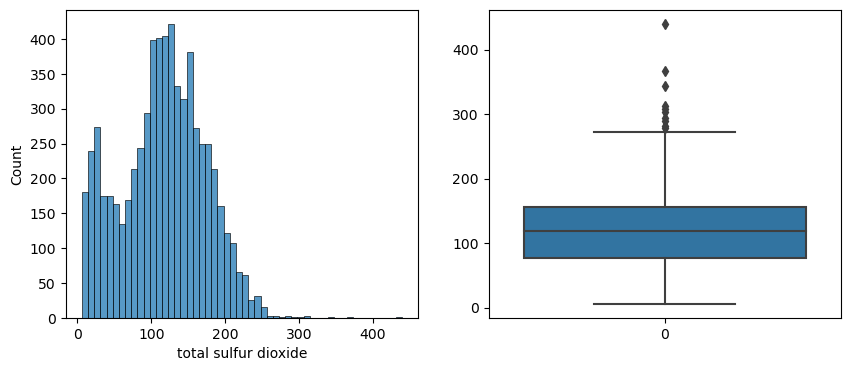

In [22]:
# Dioxido de azufre total histograma y boxplot
histograma_boxplot('total sulfur dioxide')

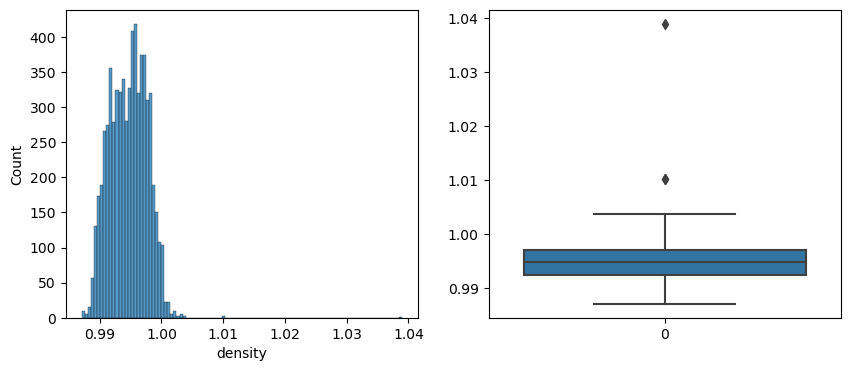

In [23]:
# Densidad histograma y boxplot
histograma_boxplot('density')

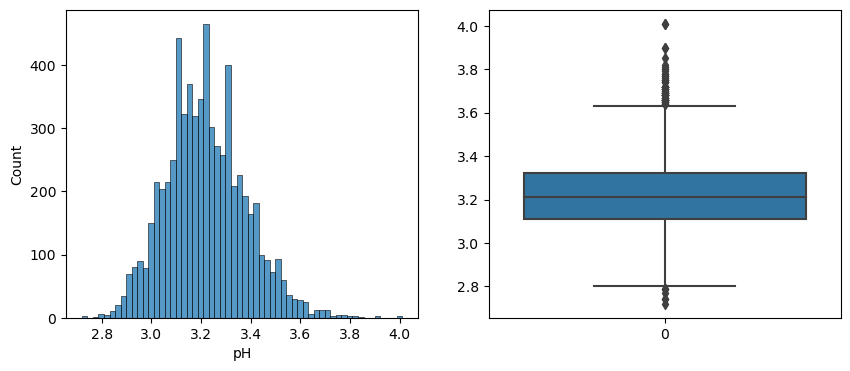

In [24]:
# pH histograma y boxplot
histograma_boxplot('pH')

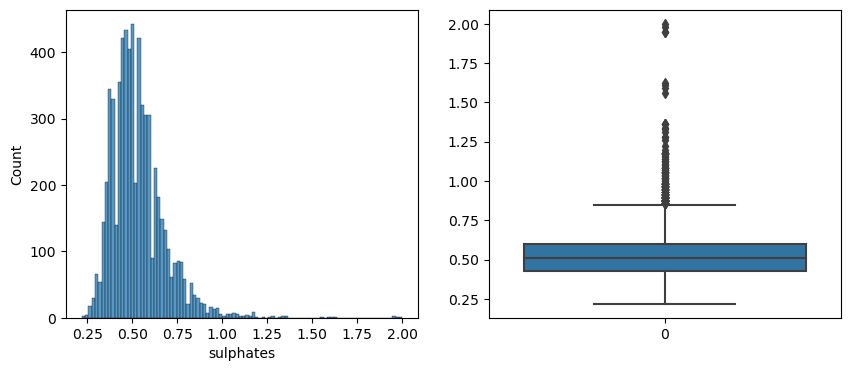

In [25]:
# Sulfatos histograma y boxplot
histograma_boxplot('sulphates')

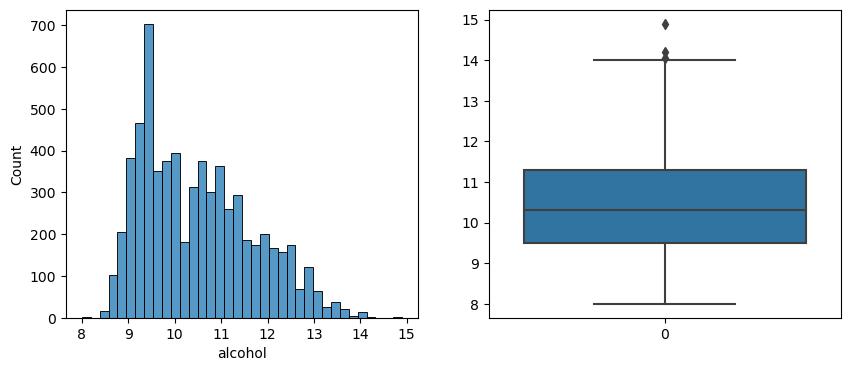

In [26]:
# Alcohol histograma y boxplot
histograma_boxplot('alcohol')

## Deteccion de Outliers

In [27]:
# Deteccion de outliers en wine
cols = wine.columns
for i in cols:
  if i == 'type':
    continue
  q1 = wine[i].quantile(0.25)
  q3 = wine[i].quantile(0.75)
  iqr = q3 - q1
  lim_inf = q1 - 1.5 * iqr
  lim_sup = q3 + 1.5 * iqr
  outliers = wine[(wine[i] < lim_inf) | (wine[i] > lim_sup)].shape[0]
  print(f"El atributo {i} tiene {outliers} outliers")

El atributo fixed acidity tiene 357 outliers
El atributo volatile acidity tiene 377 outliers
El atributo citric acid tiene 509 outliers
El atributo residual sugar tiene 118 outliers
El atributo chlorides tiene 286 outliers
El atributo free sulfur dioxide tiene 62 outliers
El atributo total sulfur dioxide tiene 10 outliers
El atributo density tiene 3 outliers
El atributo pH tiene 73 outliers
El atributo sulphates tiene 191 outliers
El atributo alcohol tiene 3 outliers
El atributo quality tiene 228 outliers


## Analisis de Asimetria

In [28]:
# Deteccion de asimetria en wine 
cols = wine.columns
for i in cols:
  if i == 'type':
    continue
  print(f"El atributo {i} tiene una asimetria de {wine[i].skew()}")

El atributo fixed acidity tiene una asimetria de 1.7232896467669239
El atributo volatile acidity tiene una asimetria de 1.4950965423685545
El atributo citric acid tiene una asimetria de 0.4717306724886708
El atributo residual sugar tiene una asimetria de 1.4354042627889907
El atributo chlorides tiene una asimetria de 5.399827731969901
El atributo free sulfur dioxide tiene una asimetria de 1.2200660740665203
El atributo total sulfur dioxide tiene una asimetria de -0.0011774782344379131
El atributo density tiene una asimetria de 0.5036017301419993
El atributo pH tiene una asimetria de 0.38683879806082694
El atributo sulphates tiene una asimetria de 1.7972700037785152
El atributo alcohol tiene una asimetria de 0.565717729098518
El atributo quality tiene una asimetria de 0.18962269337269683


## Analisis de Calidad de Vinos

<Axes: xlabel='quality', ylabel='count'>

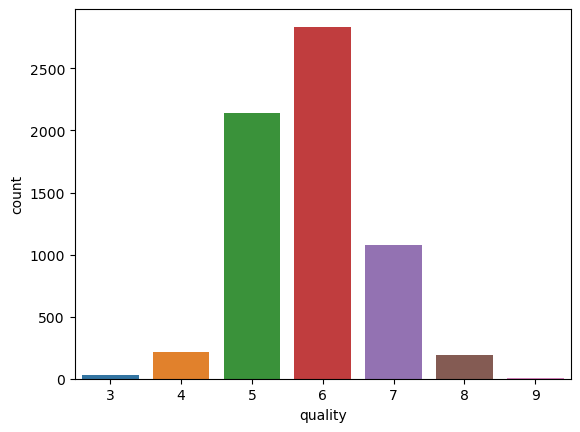

In [29]:
# Cantidades de vinos por calidad
sns.countplot(x='quality', data=wine)


## Coeficiente de Correlacion de Pearson

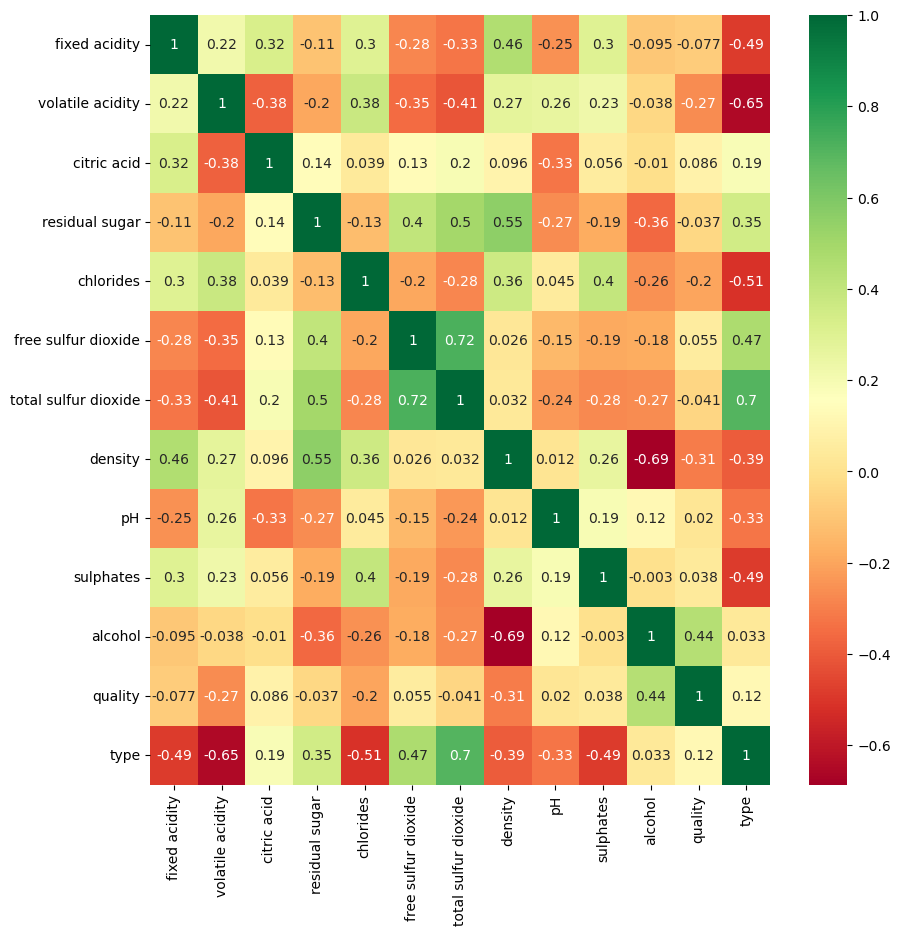

In [30]:
# Coeficiente de correlación de Pearson
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(method='pearson'), annot=True, cmap='RdYlGn')
plt.show()

In [31]:
# Atributos con mayor correlacion entre ellos
corr = wine.corr()
high_corr = corr[(corr > 0.6) | (corr < -0.6)]
high_corr = high_corr.stack().reset_index()
high_corr['abs_corr'] = high_corr[0].abs()
high_corr = high_corr[high_corr[0] != 1]  # Filtrar correlaciones diferentes de 1
high_corr = high_corr.sort_values('abs_corr', ascending=False).drop_duplicates(0)
high_corr

,level_0,level_1,0,abs_corr
7,free sulfur dioxide,total sulfur dioxide,0.720934,0.720934
10,total sulfur dioxide,type,0.700357,0.700357
12,density,alcohol,-0.686745,0.686745
2,volatile acidity,type,-0.653036,0.653036


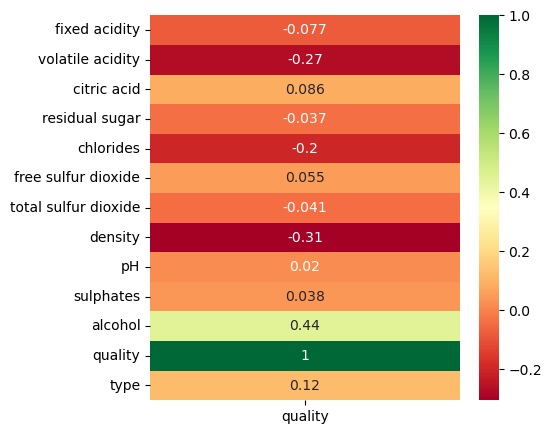

In [32]:
# Correlacion con la variable 'quality' del dataset wine a través de un mapa de calor
plt.figure(figsize=(5,5))
sns.heatmap(wine.corr()[['quality']], annot=True, cmap='RdYlGn')
plt.show()

In [33]:
# Los 3 Atributos con una fuerte correlacion respecto a la variable 'quality'
corr = wine.corr()
corr_quality = corr[['quality']].copy()
corr_quality['abs_corr'] = corr_quality['quality'].abs()
corr_quality = corr_quality[corr_quality['abs_corr'] != 1]  # Excluir correlaciones igual a 1
corr_quality = corr_quality.sort_values('abs_corr', ascending=False).head(3)

corr_quality


,quality,abs_corr
alcohol,0.444319,0.444319
density,-0.305858,0.305858
volatile acidity,-0.265699,0.265699
